## FIT5196-S2-2019 assessment 3


Date: 06/10/2019

Environment: Python 3.6.5 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas 0.19.2 (for data frame, included in Anaconda Python 3.6) 
* ast (for getting the values of a column in df as the list of lists (provides tree structure))
* operator (for using a set of functions that are similar to intrinsic operators)
* sklearn.model_selection, train_test_split (used for splitting the data into train and test sets))
* sklearn.linear_model, LinearRegression (used for creating a linear regression model)
* seaborn and matplotlib(used used for visualizations)


## Reading the dirty data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import ast
import operator
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the three files into three pandas dataframe
dirty_data_df = pd.read_csv("Group053_dirty_data.csv")
missing_data_df = pd.read_csv("Group053_missing_data.csv")
outlier_data_df = pd.read_csv("Group053_outlier_data.csv")

In [3]:
dirty_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDK10874,2018-20-01,08:30:25,Breakfast,BK,"[('Cereal', 2), ('Pancake', 9), ('Coffee', 10)...",401.25,-37.814642,144.946602,0,9.008,16.555537
1,ORDX05970,2018-12-30,20:00:00,Breakfast,BK,"[('Fish&Chips', 6), ('Shrimp', 8)]",642.00,-37.815923,144.936974,0,10.058,19.548623
2,ORDJ01346,2018-11-11,18:28:43,Dinner,TP,"[('Shrimp', 1), ('Salmon', 3), ('Fish&Chips', ...",554.50,-37.815188,144.945009,0,9.563,15.091978
3,ORDZ03007,2018-04-19,11:32:57,Breakfast,NS,"[('Eggs', 6), ('Coffee', 4)]",162.00,37.816050,144.972315,0,7.902,12.975000
4,ORDC05255,2018-03-31,10:52:23,Breakfast,NS,"[('Pancake', 8), ('Coffee', 1), ('Cereal', 5)]",306.50,-37.811766,144.963816,1,7.693,14.526149


In [4]:
dirty_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


We can see that few columns are not in their correct datatype so changing the following columns in the respective datatypes.<br>
`Order_id` changing from

In [5]:
dirty_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,494.694200,-30.754074,143.503635,0.108000,8.783926,13.822003
std,262.333712,25.336590,16.298863,0.310691,1.642041,2.456853
min,29.500000,-37.832819,-37.820920,0.000000,3.991000,5.185726
25%,297.750000,-37.818519,144.950635,0.000000,7.925250,12.559701
50%,453.100000,-37.812308,144.962914,0.000000,8.818000,13.773495
75%,674.750000,-37.804376,144.980218,0.000000,9.698250,15.251969
max,1309.000000,145.002973,145.017015,1.000000,24.121000,24.827312


In [6]:
dirty_data_df.dtypes

order_id                    object
date                        object
time                        object
order_type                  object
branch_code                 object
order_items                 object
order_price                float64
customer_lat               float64
customer_lon               float64
customerHasloyalty?          int64
distance_to_customer_KM    float64
delivery_fee               float64
dtype: object

In [7]:
dirty_data_df.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,296,72,3,6,497
top,ORDZ07731,2018-03-19,10:32:06,Breakfast,NS,"[('Eggs', 2), ('Pancake', 9)]"
freq,1,6,18,174,168,2


* If we check the order id, all 500 items have unique order id and no integrity constraints have been violated


In [8]:
dirty_data_df.order_type.value_counts()

Breakfast    174
Dinner       163
Lunch        163
Name: order_type, dtype: int64

## Splitting the date column

In [9]:
##Splitting the date column in the main dataframe into three parts year, mpnth and day and storing in other new df named checking
checking = dirty_data_df['date'].apply(lambda x: pd.Series({'year':x.split('-')[0].strip(),'month':x.split('-')[1].strip(),'day':x.split('-')[2].strip()}))

In [10]:
## Since all the individual values will be numeric form we are converting the values from string to numeric
checking['day'] = pd.to_numeric(checking['day']) 
checking['month'] = pd.to_numeric(checking['month']) 
checking['year'] = pd.to_numeric(checking['year']) 

In [11]:
checking.year.unique()

array([2018,    6,    7,    4,    9,   12,    1], dtype=int64)

Here we are checking unique values for the year column we see that few values are wrong, may be because of the date format that the user have entered. So we need to check the other columns `month` and `date`.<br>
Getting the index values of the rows which donot have correct year and storing the indexes in `year_index`

In [12]:
miserror_year = [6,7,4,9,12,1]
year_index = checking[checking.year.isin(miserror_year)].index.values.astype(int)

Checking if values in `month` column are correct or not, these values should range from 1 - 12.<br>
If the value is greater than 12 then that might be a date and the month and date columns should be interchanged.<br>
Storing the wrong month indexes in the `month_index` 

In [13]:
month_index = checking[checking['month'] > 12].index.values.astype(int)

The day should always be between 1-31 anything greater than than should a error and should be fixed. <br>
Checking the date column and storing the indexes in the `date index` if anything wrong is identified

In [14]:
date_index = checking[checking['day'] > 31].index.values.astype(int)

**Interchanging the day and year column**

In [15]:
checking.loc[date_index,['day','year']] = checking.loc[date_index,['year','day']].values

**Interchanging the day and month column**

In [16]:
checking.loc[month_index,['day','month']] =  checking.loc[month_index,['month','day']].values
checking['date'] = checking['year'].map(str) + '-' + checking['month'].map(str) + '-' + checking['day'].map(str)
checking['date'] = pd.to_datetime(checking['date'],format="%Y/%m/%d")
dirty_data_df['date'] = checking['date']

In [17]:
dirty_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDK10874,2018-01-20,08:30:25,Breakfast,BK,"[('Cereal', 2), ('Pancake', 9), ('Coffee', 10)...",401.25,-37.814642,144.946602,0,9.008,16.555537
1,ORDX05970,2018-12-30,20:00:00,Breakfast,BK,"[('Fish&Chips', 6), ('Shrimp', 8)]",642.00,-37.815923,144.936974,0,10.058,19.548623
2,ORDJ01346,2018-11-11,18:28:43,Dinner,TP,"[('Shrimp', 1), ('Salmon', 3), ('Fish&Chips', ...",554.50,-37.815188,144.945009,0,9.563,15.091978
3,ORDZ03007,2018-04-19,11:32:57,Breakfast,NS,"[('Eggs', 6), ('Coffee', 4)]",162.00,37.816050,144.972315,0,7.902,12.975000
4,ORDC05255,2018-03-31,10:52:23,Breakfast,NS,"[('Pancake', 8), ('Coffee', 1), ('Cereal', 5)]",306.50,-37.811766,144.963816,1,7.693,14.526149


**Converting the time column to timestamp datatype**

In [18]:
#del checking
dirty_data_df['time'] = pd.to_datetime(dirty_data_df['time'])

In [19]:
from datetime import datetime
dirty_data_df['time'] = [d.time() for d in dirty_data_df['time']]

In [20]:
dirty_data_df.dtypes

order_id                           object
date                       datetime64[ns]
time                               object
order_type                         object
branch_code                        object
order_items                        object
order_price                       float64
customer_lat                      float64
customer_lon                      float64
customerHasloyalty?                 int64
distance_to_customer_KM           float64
delivery_fee                      float64
dtype: object

### Checking the the order_type according to the time they have delivered.

Generating the timestamps based on the given conditions<br>
a. Breakfast - served during morning (8am - 12pm), <br>
b. Lunch - served during afternoon (12:00:01pm - 4pm)<br>
c. Dinner - served during evening (4:00:01pm - 8pm)<br>

In [21]:
brkfst_starttime = datetime.now().time().replace(hour = 8, minute = 0, second=0, microsecond = 0) 
brkfst_endtime = datetime.now().time().replace(hour = 12, minute = 0, second=0, microsecond = 0)
lun_starttime = datetime.now().time().replace(hour = 12, minute = 0, second=1, microsecond = 0)
lun_endtime = datetime.now().time().replace(hour = 16, minute = 0, second=0, microsecond = 0)
dnr_starttime = datetime.now().time().replace(hour = 16, minute = 0, second=1, microsecond = 0)
dnr_endtime = datetime.now().time().replace(hour = 20, minute = 0, second=0, microsecond = 0)

In [22]:
def new_order_type(row):
    """
    Function Name: new_order_type
    number of arguments: 1
    Description: This function checks each row of the time column where it fits between which timestamp and returns the respective order_type string
    Return value: String value
    """
    time_val = row['time']
    if (time_val >= brkfst_starttime and time_val <= brkfst_endtime):
        return "Breakfast"
    elif (time_val > lun_starttime and time_val <= lun_endtime):
        return "Lunch"
    elif (time_val > dnr_starttime and time_val <= dnr_endtime):
        return "Dinner"
 #   return return_val

In [23]:
mrng = len(dirty_data_df[(dirty_data_df['time'] >= brkfst_starttime) & (dirty_data_df['time'] <= brkfst_endtime) ])
lunch = len(dirty_data_df[(dirty_data_df['time'] > lun_starttime) & (dirty_data_df['time'] <= lun_endtime) ])
dnr = len(dirty_data_df[(dirty_data_df['time'] > dnr_starttime) & (dirty_data_df['time'] <= dnr_endtime) ])
mrng_index = dirty_data_df[(dirty_data_df['time'] >= brkfst_starttime) & (dirty_data_df['time'] <= brkfst_endtime) & (dirty_data_df['order_type'] != "Breakfast") ].index.values.astype(int)
lunch_index = dirty_data_df[(dirty_data_df['time'] > lun_starttime) & (dirty_data_df['time'] <= lun_endtime) & (dirty_data_df['order_type'] != "Lunch") ].index.values.astype(int)
dnr_index = dirty_data_df[(dirty_data_df['time'] > dnr_starttime) & (dirty_data_df['time'] <= dnr_endtime) & (dirty_data_df['order_type'] != "Dinner") ].index.values.astype(int)

In [24]:
print("Number of meals served between 8am to 12pm: ",mrng)
print("Number of meals served between 12:00:01pm to 4pm: ",lunch)
print("Number of meals served between 4:00:01pm to 8pm: ",dnr)

Number of meals served between 8am to 12pm:  168
Number of meals served between 12:00:01pm to 4pm:  165
Number of meals served between 4:00:01pm to 8pm:  167


In [25]:
#dirty_data_df['order_type'] = dirty_data_df['new_order_type']
dirty_data_df.order_type.value_counts()


Breakfast    174
Dinner       163
Lunch        163
Name: order_type, dtype: int64

If you check the number of meals served between times and the order_type has different counts.<br>
**`Actual breakfast` served are *162*, but number of `breakfast according to given dataset` are *174***<br>
**`Actual lunch` served are *165*, but number of `lunch according to given dataset` are *163***<br>
**`Actual dinner` served are *167*, but number of `dinner according to given dataset` are *163***<br>

**Generating the correct ordertype for the given conditions**<br>


In [26]:
dirty_data_df['new_order_type'] = dirty_data_df.apply(lambda x: new_order_type(x), axis = 1)


In [27]:
dirty_data_df.new_order_type.value_counts()


Breakfast    168
Dinner       167
Lunch        165
Name: new_order_type, dtype: int64

Now in the new_order_type column we have the correct `order_type` so we can use this column to replace the values of the existing order_type column and delete the new created column


In [28]:
dirty_data_df['order_type'] = dirty_data_df['new_order_type']
dirty_data_df.order_type.value_counts()

Breakfast    168
Dinner       167
Lunch        165
Name: order_type, dtype: int64

Now the values are correct, we can now delete the new order type column from the dataframe

In [29]:
del dirty_data_df['new_order_type']

In [30]:
dirty_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDK10874,2018-01-20,08:30:25,Breakfast,BK,"[('Cereal', 2), ('Pancake', 9), ('Coffee', 10)...",401.25,-37.814642,144.946602,0,9.008,16.555537
1,ORDX05970,2018-12-30,20:00:00,Dinner,BK,"[('Fish&Chips', 6), ('Shrimp', 8)]",642.00,-37.815923,144.936974,0,10.058,19.548623
2,ORDJ01346,2018-11-11,18:28:43,Dinner,TP,"[('Shrimp', 1), ('Salmon', 3), ('Fish&Chips', ...",554.50,-37.815188,144.945009,0,9.563,15.091978
3,ORDZ03007,2018-04-19,11:32:57,Breakfast,NS,"[('Eggs', 6), ('Coffee', 4)]",162.00,37.816050,144.972315,0,7.902,12.975000
4,ORDC05255,2018-03-31,10:52:23,Breakfast,NS,"[('Pancake', 8), ('Coffee', 1), ('Cereal', 5)]",306.50,-37.811766,144.963816,1,7.693,14.526149


**creating the type of the day column as the delivery fee differs for weekday and weekend**

Now we have to find whether, the day on which the ordered placed is weekend or weekday (1 or 0). So from the date column, we will extract the day name using day_name() and replace them day names with 1 or 0 for weekend or weekday respectively.

In [31]:
def day_type(row):
    #print(row['date'])
    val = row['date'].dayofweek
    if (val >=0 and val <5):  #weekday represented by 0
        return 0
    else:           #weekend represented by 1
        return 1

In [32]:
dirty_data_df['type_of_day']= dirty_data_df.apply(lambda x: day_type(x), axis =1)

## customer_lon column

Plotting customer longitude column values using scatter plot to find customer_lon errors.

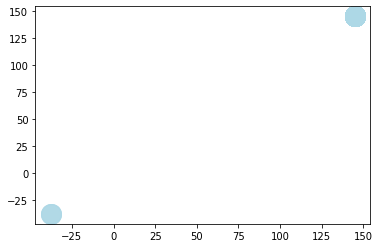

In [33]:
# ax2 = plt.subplot(221)
# ax2.plot(dirty_data_df['customer_lon'], dirty_data_df['customer_lon'], '.r')
plt.scatter(dirty_data_df['customer_lon'], dirty_data_df['customer_lon'],  s=400, c='lightblue', alpha=0.5)


As we can see latitude and longitude values in the ditry_data got swapped, we will take deeper look into the two columns as shown below.

In [34]:
dirty_data_df[dirty_data_df['customer_lon'] < 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day
208,ORDC01409,2018-11-21,18:38:52,Dinner,NS,"[('Shrimp', 3), ('Pasta', 2), ('Fish&Chips', 1...",580.0,144.935750,-37.813348,0,10.194,16.069138,0
287,ORDJ02599,2018-12-02,19:09:17,Dinner,TP,"[('Salmon', 4), ('Shrimp', 3), ('Fish&Chips', ...",611.0,144.957898,-37.820920,0,7.935,13.729100,1
373,ORDZ07734,2018-11-18,18:38:52,Dinner,NS,"[('Pasta', 8), ('Salmon', 8), ('Shrimp', 2)]",656.0,145.002973,-37.810811,0,9.698,17.977496,1
414,ORDI10127,2018-09-26,16:47:19,Dinner,NS,"[('Shrimp', 8), ('Fish&Chips', 2), ('Salmon', 9)]",871.0,144.961107,-37.799221,0,7.283,13.184118,0


We can see `customer_lan` and `customer_lon`column values got misplaced. Using `.loc()` method in pandas, we swap both colulmn values with respect to index values. 

In [35]:
# getting the index values of the misplaced rows 
longitude_miss_indices = list(dirty_data_df[dirty_data_df['customer_lon'] < 0].index.values.astype(int))
longitude_miss_indices  # misplaced index values 

[208, 287, 373, 414]

After acquiring index values `longitude_miss_indices` of misplaced rows, we swap the values using `loc()` method in pandas as shown below.

In [36]:
# for values in longitude_miss_indices we swap
for i in longitude_miss_indices:          
    temp = dirty_data_df.loc[i,'customer_lat']         # storing customer_lat value in temp variable
    dirty_data_df.loc[i,'customer_lat'] = dirty_data_df.loc[i,'customer_lon']   # assigning customer_lon value to customer_lat using index value
    dirty_data_df.loc[i,'customer_lon'] = temp        # assigning value stored in temp variable to customer_lon

Checking for customer_lon misplaced values after fixing the errors.

In [37]:
dirty_data_df[dirty_data_df['customer_lon'] < 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day


## customer_lat

After fixing errors in `customer_lon` column, we try to find the errors in `customer_lat` column. At first, we visualize column `customer_lat` as shown below.

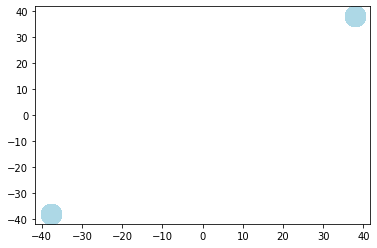

In [38]:
# plotting customer_lat column values
plt.scatter(dirty_data_df['customer_lat'], dirty_data_df['customer_lat'], s=400, c='lightblue', alpha=0.5)

As we can see some of the customer latitude values are positive which are in the range of 30-40. These are the values we need to fix in the `customer_lat` column.

So we take a deeper look into those positive values in `customer_lat` column. 

In [39]:
# positive values in the customer_lat column 
dirty_data_df[dirty_data_df['customer_lat'] > 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day
3,ORDZ03007,2018-04-19,11:32:57,Breakfast,NS,"[('Eggs', 6), ('Coffee', 4)]",162.00,37.816050,144.972315,0,7.902,12.975000,0
19,ORDI07430,2018-08-14,15:26:11,Lunch,NS,"[('Chicken', 7), ('Burger', 7), ('Fries', 2), ...",862.00,37.812902,144.972366,0,7.668,13.244422,0
25,ORDX03476,2018-05-13,12:23:39,Lunch,BK,"[('Steak', 10), ('Burger', 5), ('Salad', 9)]",759.80,37.812328,144.958108,0,8.271,16.568232,1
32,ORDI07880,2018-09-30,16:57:27,Dinner,NS,"[('Pasta', 10), ('Salmon', 6)]",521.00,37.824145,144.990571,0,9.628,16.914060,1
58,ORDB02439,2018-06-07,13:04:13,Lunch,TP,"[('Chicken', 6), ('Fries', 9)]",300.00,37.803573,144.949038,0,9.927,13.287700,0
70,ORDK02084,2018-06-28,13:54:55,Lunch,BK,"[('Burger', 2), ('Salad', 4), ('Chicken', 10),...",702.80,37.814455,144.983481,0,6.017,11.820151,0
72,ORDY02896,2018-04-16,11:22:49,Breakfast,TP,"[('Pancake', 1), ('Eggs', 2)]",68.25,37.812598,144.960745,0,8.384,11.566757,0
107,ORDJ01836,2018-11-23,18:49:00,Dinner,TP,"[('Pasta', 9), ('Shrimp', 10), ('Fish&Chips', 6)]",997.50,37.805582,144.945080,0,10.058,14.139511,0
123,ORDI07985,2018-03-12,10:11:49,Breakfast,NS,"[('Cereal', 4), ('Pancake', 4), ('Coffee', 2)]",196.00,37.815309,144.945919,0,9.158,13.788701,0
138,ORDX05958,2018-05-17,12:23:39,Lunch,BK,"[('Chicken', 10), ('Salad', 7), ('Fries', 3), ...",904.40,37.808531,144.963284,0,7.508,13.419610,0


In column `customer_lat`, some of the latitude values are misprinted as positive values i.e negative sign is missing `-1`, so we approach this task my considering the index values of `customer_lat` column and multiplying them with `-1`.  

In [40]:
# getting index values of the misprinted rows where customer_lat > 0 
latitude_miss_indices = list(dirty_data_df[dirty_data_df['customer_lat'] > 0].index.values.astype(int))
print(latitude_miss_indices)

[3, 19, 25, 32, 58, 70, 72, 107, 123, 138, 155, 158, 160, 164, 165, 176, 199, 200, 210, 211, 216, 230, 246, 269, 273, 294, 319, 340, 344, 348, 351, 370, 379, 403, 436, 459, 482]


Fixing errors using `loc()` method in pandas.

In [41]:
for i in latitude_miss_indices:
    dirty_data_df.loc[i,'customer_lat'] = dirty_data_df.loc[i,'customer_lat']*-1    # multiplying error rows with -1 
    

Checking for `customer_lon` column errors after fixing them.

In [42]:
dirty_data_df[dirty_data_df['customer_lat'] > 0]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day


## Branch_code


Typos are the most common error, particularly whenever the data collection process involves human. While we were collecting the data, we might mis-type the name of the branch_code. It is always a good idea to check the categorical variables to make sure their values are spelled without errors. Let's look at the <font color="blue">branch_code</font>. You can also use the <font color="blue">value_counts()</font> function.

In [43]:
dirty_data_df.branch_code.value_counts()

NS    168
TP    166
BK    136
tp     12
bk      9
ns      9
Name: branch_code, dtype: int64

From the above output,
The typos are,
- NS v.s ns
- TP v.s tp
- BK v.s bk

So, we will replace these typos with respective values as shown below.

In [44]:
dirty_data_df.branch_code.replace({'ns': 'NS','tp': 'TP','bk':'BK'}, inplace = True)

Now let's check the replaced values.

In [45]:
dirty_data_df.branch_code.value_counts()

TP    178
NS    177
BK    145
Name: branch_code, dtype: int64

From outliers data we check for correct branch codes.

In [46]:
order_ids = outlier_data_df[['order_id','branch_code']]   # taking two columns to find the pattern between two columns.

In [47]:
order_ids.head()

,order_id,branch_code
0,ORDJ08127,TP
1,ORDJ03196,TP
2,ORDX00228,BK
3,ORDJ05076,TP
4,ORDX09337,BK


In [48]:
order_ids['order_number'] = order_ids.apply(lambda x: x.order_id[0:4], axis = 1) # taking first 4 letters in order_id column

In [49]:
order_ids.groupby(['branch_code','order_number']).size()   # group the columns

branch_code  order_number
BK           ORDA            45
             ORDK            62
             ORDX            54
NS           ORDC            67
             ORDI            48
             ORDZ            59
TP           ORDB            46
             ORDJ            56
             ORDY            63
dtype: int64

In [50]:
outlier_data_df['branch_code'][(outlier_data_df.order_id.str.startswith('ORDB')) | (outlier_data_df.order_id.str.startswith('ORDJ')) | (outlier_data_df.order_id.str.startswith('ORDY'))].value_counts() 

TP    165
Name: branch_code, dtype: int64

In [51]:
outlier_data_df['branch_code'][(outlier_data_df.order_id.str.startswith('ORDI')) | (outlier_data_df.order_id.str.startswith('ORDC')) | (outlier_data_df.order_id.str.startswith('ORDZ'))].value_counts() 

NS    174
Name: branch_code, dtype: int64

In [52]:
outlier_data_df['branch_code'][(outlier_data_df.order_id.str.startswith('ORDX')) | (outlier_data_df.order_id.str.startswith('ORDK')) | (outlier_data_df.order_id.str.startswith('ORDA'))].value_counts() 

BK    161
Name: branch_code, dtype: int64

From the above output cells we conclude branch_code column as follows:
- if the order is placed in TP branch, then order_id must startswith **'ORDB' or 'ORDJ' or 'ORDY'**.
- if the order is placed in NS branch, then order_id must startswith **'ORDI' or 'ORDC' or 'ORDZ'**.
- if the order is placed in BK branch, then order_id must startswith **'ORDX' or 'ORDK' or 'ORDA'**.


Let's check in dirty data file branch_code column.

In [53]:
dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDB')) | (dirty_data_df.order_id.str.startswith('ORDJ')) | (dirty_data_df.order_id.str.startswith('ORDY'))].value_counts() 

TP    167
BK      5
NS      3
Name: branch_code, dtype: int64

In [54]:
dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDI')) | (dirty_data_df.order_id.str.startswith('ORDC')) | (dirty_data_df.order_id.str.startswith('ORDZ'))].value_counts() 

NS    170
TP      6
BK      2
Name: branch_code, dtype: int64

In [55]:
dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDX')) | (dirty_data_df.order_id.str.startswith('ORDK')) | (dirty_data_df.order_id.str.startswith('ORDA'))].value_counts() 

BK    138
TP      5
NS      4
Name: branch_code, dtype: int64

So we see that branch_code values has been misplaced in the dirty data file. We replace those values with correct values.

There are about 8 misplaced observations for TP branch, we replace those observations with `TP`<br>
There are about 8 misplaced observations for NS branch, we replace those observations with `NS`<br>
There are about 9 misplaced observations for BK branch, we replace those observations with `BK`<br>

In [56]:
dirty_data_df.loc[(dirty_data_df.order_id.str.startswith('ORDB')) | (dirty_data_df.order_id.str.startswith('ORDJ')) | (dirty_data_df.order_id.str.startswith('ORDY')), 'branch_code'] = 'TP' 
dirty_data_df.loc[(dirty_data_df.order_id.str.startswith('ORDI')) | (dirty_data_df.order_id.str.startswith('ORDC')) | (dirty_data_df.order_id.str.startswith('ORDZ')), 'branch_code'] = 'NS'
dirty_data_df.loc[(dirty_data_df.order_id.str.startswith('ORDX')) | (dirty_data_df.order_id.str.startswith('ORDK')) | (dirty_data_df.order_id.str.startswith('ORDA')), 'branch_code'] = 'BK'

In [57]:
print(dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDB')) | (dirty_data_df.order_id.str.startswith('ORDJ')) | (dirty_data_df.order_id.str.startswith('ORDY'))].value_counts())
print(dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDI')) | (dirty_data_df.order_id.str.startswith('ORDC')) | (dirty_data_df.order_id.str.startswith('ORDZ'))].value_counts())
print(dirty_data_df['branch_code'][(dirty_data_df.order_id.str.startswith('ORDX')) | (dirty_data_df.order_id.str.startswith('ORDK')) | (dirty_data_df.order_id.str.startswith('ORDA'))].value_counts())

TP    175
Name: branch_code, dtype: int64
NS    178
Name: branch_code, dtype: int64
BK    147
Name: branch_code, dtype: int64


The branch_code column in dirty data is replaced with correct branch_code values.

## distance_to_customer_KM

The distance_to_customer_KM is shortest distance betweeen branch and customer location. The distance is calculated as follows,
- Since we have branch code, we can get the branch's latitude and longitude from the file `branches.csv`. We merge the dataframes(branches and dirty_data_df) to extract branch latitude and longitude for particular branch in dirty_data_df.
- After extracting branch latitude and longitude, we need to extract branch_node from the `nodes.csv` file, since we `branch node` and `customer node` to calculate the shortest distance using `dijkstra's algorithm`.
- The same way for each customer latitude and longitude, we extract node id using nodes dataframe.
- After getting both node ids of branch and customer locations, we will find the shortest distance between two nodes using `edges.csv` file.
- After getting actual distance from dijkstra's algorithm, we check for any miss calculated distance from the dirty_data_df `distance_to_customer_KM column`, we replace with the actual distance value. 

### Extracting branches latitude and longitude 

Now we load `branches.csv` to get the branch latitude and longitudes with respect to branch codes in our `dirty_data_df` dataframe.

In [58]:
branches_df = pd.read_csv('branches.csv')
branches_df.head()

,branch_code,branch_name,branch_lat,branch_lon
0,NS,Nickolson,-37.773803,144.983647
1,TP,Thompson,-37.861835,144.905716
2,BK,Bakers,-37.815834,145.046450


So we merge both the dataframes on `branch_code` to get `branch_lat` and `branch_lon` using `pd.merge()` method.

In [59]:
# merging dirty_data_df and branches_df on branch_code
dirty_data_df = pd.merge(dirty_data_df, branches_df, how = 'left',on = 'branch_code')

### Extracting Node IDs

Now we extract latitude and longitude node ids using `nodes.csv` for branch and customer latitudes and longitudes. 

In [60]:
# loading nodes data
nodes_df = pd.read_csv('nodes.csv')
nodes_df.head()

,node,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


Now we proceed to extract branch node id for respective branch latitude and longitude.

In [61]:
# merging dirty_data_df and nodes_df
dirty_data_df = pd.merge(dirty_data_df, nodes_df, how = 'left', left_on = ['branch_lat','branch_lon'], right_on= ['lat','lon'] )

In the same way, we merge dirty_data_df and nodes_df to extract customer node id for customer latitude and longitude. 

In [62]:
# merging dirty_data_df and nodes_df
dirty_data_df = pd.merge(dirty_data_df, nodes_df, how = 'left', left_on = ['customer_lat','customer_lon'], right_on= ['lat','lon'] )

In [63]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day', 'branch_name',
       'branch_lat', 'branch_lon', 'node_x', 'lat_x', 'lon_x', 'node_y',
       'lat_y', 'lon_y'],
      dtype='object')

- Deleting unwanted columns called `lat_x`, `lon_x`, `lat_y` and `lon_y`. 
- Renaming columns `node_x` and `node_y` to `branch_node` and `customer_node` respectively.

In [64]:
# deleting the columns
dirty_data_df = dirty_data_df.drop(['lat_x','lon_x','lat_y','lon_y'], axis = 1)

In [65]:
# renaming the columns
dirty_data_df.rename(columns = {'node_x' : 'branch_node', 'node_y' : 'customer_node'}, inplace = True)

In [66]:
dirty_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,branch_name,branch_lat,branch_lon,branch_node,customer_node
0,ORDK10874,2018-01-20,08:30:25,Breakfast,BK,"[('Cereal', 2), ('Pancake', 9), ('Coffee', 10)...",401.25,-37.814642,144.946602,0,9.008,16.555537,1,Bakers,-37.815834,145.046450,1889485053,636754479
1,ORDX05970,2018-12-30,20:00:00,Dinner,BK,"[('Fish&Chips', 6), ('Shrimp', 8)]",642.00,-37.815923,144.936974,0,10.058,19.548623,1,Bakers,-37.815834,145.046450,1889485053,1560149542
2,ORDJ01346,2018-11-11,18:28:43,Dinner,TP,"[('Shrimp', 1), ('Salmon', 3), ('Fish&Chips', ...",554.50,-37.815188,144.945009,0,9.563,15.091978,1,Thompson,-37.861835,144.905716,1390575046,3199579113
3,ORDZ03007,2018-04-19,11:32:57,Breakfast,NS,"[('Eggs', 6), ('Coffee', 4)]",162.00,-37.816050,144.972315,0,7.902,12.975000,0,Nickolson,-37.773803,144.983647,2455254505,1449431579
4,ORDC05255,2018-03-31,10:52:23,Breakfast,NS,"[('Pancake', 8), ('Coffee', 1), ('Cereal', 5)]",306.50,-37.811766,144.963816,1,7.693,14.526149,1,Nickolson,-37.773803,144.983647,2455254505,4544035095


Loading edges file data.

In [67]:
edges = pd.read_csv('edges.csv')   # loading the edges data

In [68]:
G = nx.from_pandas_edgelist(edges,'u','v',['distance(m)'])  # return a graph from pandas dataframe containing edge list

In [69]:
# function to calculate distance 
def distance_calculation(path, edges):
    """
    Function Name: distance_calculation
    Number_of_arguments: 2
    Arguments: path, edges
    Description: This function adds all the paths distance to get the final distance between origin and destination nodes which is taking each row value from the edges dataframe and getting the distance.
    Return value: distance value
    """
    dd = 0
    for i in range(len(path)-1):
        dd = dd + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] )
    return dd

In [70]:
def distance(G, edges_df, row):
    """
    Function Name: distance
    number of arguments: 3
    Description: This function checks each row of the branch_node column and customer_node column to find the shortest path using dijkstra_path algorithm and the path which
                 is obtained is passed to distance_calculation function as argument to get the distance value.
    Return value: float value 
    """
    
    src = row['branch_node']    # row value of branch_node column
    des = row['customer_node']    # row value of customer_node column
    p = nx.dijkstra_path(G,src,des,weight='distance(m)')    # shortest path is obtained
    distance_value = distance_calculation(p, edges_df)/1000 # actual distance is obtained using distance_calculation function
    return distance_value


In [71]:
# calling distance function 
dirty_data_df['actual_distance'] = dirty_data_df.apply(lambda x: distance(G, edges, x), axis = 1)

Since we have obtained actual distance column, we check for miss calculated distances in the column `distance_to_customer_KM` as follows.

In [72]:
missclassified_distances  = list(dirty_data_df[round(dirty_data_df['distance_to_customer_KM'],3) != dirty_data_df['actual_distance']].index.values.astype(int))

We extracted the indices of the miss calculated distance rows in the `distance_to_customer_KM` column.   

In [73]:
print(missclassified_distances)

[30, 31, 52, 57, 62, 84, 93, 95, 120, 124, 203, 207, 215, 231, 232, 239, 242, 256, 262, 263, 313, 315, 333, 337, 341, 358, 369, 376, 398, 401, 415, 432, 441, 455, 467, 472, 485]


Replacing the row values of column `distance_to_customer_KM` with row values of `actual_distance` column for respective indices.

In [74]:
for i in missclassified_distances:
    dirty_data_df.loc[i,'distance_to_customer_KM'] = dirty_data_df.loc[i,'actual_distance']

Let's check for any miss calculated distances.

In [75]:
dirty_data_df[round(dirty_data_df['distance_to_customer_KM'],3) != dirty_data_df['actual_distance']]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,branch_name,branch_lat,branch_lon,branch_node,customer_node,actual_distance


Miss calculated distance rows have been replaced in the `dirty_data_df`.

We delete all the irrelavent columns from the `dirty_data_df` as follows. 

In [76]:
# deleting the columns
dirty_data_df = dirty_data_df.drop(['branch_name','branch_lat','branch_lon','branch_node','customer_node','actual_distance'], axis = 1)

In [77]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day'],
      dtype='object')

## Order_items 

Given each meal has distinct set of items in the menu, for example breakfast items can't be served during lunch or dinner and so on. So to find the items served in breakfast, lunch and dinner 
- Since we have correct order items in missing and outliers data for breakfast, lunch and dinner meals, we extract breakfast, lunch and dinner items from missing and outliers data.
- Once we obtain breakfast, lunch and dinner items, we check in `order_items` column `dirty_data_df` and remove respective items from the order_items.

In [78]:
missing_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDK10493,2018-02-17,09:31:16,Breakfast,BK,"[('Coffee', 10), ('Cereal', 5), ('Pancake', 8)]",374.00,-37.804291,144.949809,0,8.891,16.251048
1,ORDI03704,2018-01-03,08:00:00,Breakfast,NS,"[('Cereal', 7), ('Pancake', 9), ('Eggs', 8)]",541.25,-37.813428,144.941097,1,9.498,7.592900
2,ORDK06716,2018-08-02,15:05:54,Lunch,BK,"[('Burger', 6), ('Fries', 5), ('Salad', 10), (...",823.00,-37.799679,144.954943,0,8.520,14.593719
3,ORDX08186,2018-05-26,12:43:56,Lunch,BK,"[('Salad', 1), ('Burger', 7), ('Fries', 10)]",354.20,-37.805850,144.955864,0,8.074,16.380353
4,ORDB02119,2018-02-11,09:21:07,Breakfast,TP,"[('Cereal', 5), ('Pancake', 10)]",347.50,-37.810262,144.969583,0,8.855,12.187842


In [79]:
outlier_data_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDJ08127,2018-06-02,12:54:05,Lunch,TP,"[('Burger', 10), ('Chicken', 9), ('Salad', 3),...",721.60,-37.800055,144.928417,0,11.596,16.321208
1,ORDJ03196,2018-06-09,13:14:21,Lunch,TP,"[('Salad', 7), ('Chicken', 9)]",408.40,-37.820481,144.984090,0,9.284,14.756106
2,ORDX00228,2018-02-19,09:31:16,Breakfast,BK,"[('Eggs', 9), ('Coffee', 10), ('Cereal', 2), (...",484.75,-37.808644,144.962895,0,7.544,12.472215
3,ORDJ05076,2018-08-09,15:16:03,Lunch,TP,"[('Chicken', 9), ('Burger', 8), ('Salad', 10)]",708.00,-37.805317,144.940949,0,10.412,13.438908
4,ORDX09337,2018-04-27,11:43:05,Breakfast,BK,"[('Eggs', 6), ('Cereal', 6), ('Coffee', 8), ('...",342.25,-37.810459,144.965840,0,7.329,11.581713


We have both the missing and outliers dataframes, we proceed to extract breakfast, lunch and dinner items.

### Chaging the values of the column from string to list


A function named `chng_str_list` is defined to convert str value of each row in order_item column to list in all three dataframes.

In [80]:
# changes str value to list
def chng_str_list(val):
    return ast.literal_eval(val['order_items'])   # ast.literal_eval() method converts and returns a list
# calling the function to convert string values to list
missing_data_df['order_items'] = missing_data_df.apply(chng_str_list,axis = 1)
dirty_data_df['order_items'] = dirty_data_df.apply(chng_str_list,axis = 1)
outlier_data_df['order_items'] = outlier_data_df.apply(chng_str_list, axis = 1)

After converting the row values of order_item to list, we need to extract the breakfast, lunch and dinner items. For that we defined a function called `get_unique_items()`.

In [81]:
### give unique items in each menu and each dataframe
def get_unique_items(df,menu):
    """
    Function Name: get_unique_items
    number of arguments: 2
    Description: Extracts items in each meal in missing and outliers dataframes and returns a set which contains unique items for each meal offered
    Return value: Set
    """
    
    item_list =[]
    flat_item_list = []
    sub_df = df[df["order_type"]==menu]   
    items_list = sub_df["order_items"]  #checks if menu is equal to order_type in the dataframe, then we take all those menu items into one list
    for i in items_list:     # for each list in items_list
        item, val = zip(*i)  # considering only the items 
        item_list.append(item)  # appending them to list 
    flat_item_list = [val for sublist in item_list for val in sublist]    # flat the list 
    item_set = set(flat_item_list)   # set of that list gives items in the particular meal
    return item_set

From missing data, we use `get_unique_items()` to extract the breakfast, lunch and dinner items as shown below

In [82]:
items_brkfst_missing_data_df = get_unique_items(missing_data_df,"Breakfast")
items_lunch_missing_data_df = get_unique_items(missing_data_df,"Lunch")
items_dinner_missing_data_df = get_unique_items(missing_data_df,"Dinner")


In [83]:
print('Items obtained using missing data')
print('Breakfast items :',items_brkfst_missing_data_df)
print('Lunch items :',items_lunch_missing_data_df)
print('Dinner items :',items_dinner_missing_data_df)

Items obtained using missing data
Breakfast items : {'Coffee', 'Eggs', 'Cereal', 'Pancake'}
Lunch items : {'Steak', 'Chicken', 'Burger', 'Salad', 'Fries'}
Dinner items : {'Shrimp', 'Salmon', 'Pasta', 'Fish&Chips'}


Now let's look into items obatined using outliers data

In [84]:
items_brkfst_outlier_data_df = get_unique_items(outlier_data_df,"Breakfast")
items_lunch_outlier_data_df = get_unique_items(outlier_data_df,"Lunch")
items_dinner_outlier_data_df = get_unique_items(outlier_data_df,"Dinner")


In [85]:
print('Items obtained using outliers data')
print('Breakfast items :',items_brkfst_outlier_data_df)
print('Lunch items :',items_lunch_outlier_data_df)
print('Dinner items :',items_dinner_outlier_data_df)

Items obtained using outliers data
Breakfast items : {'Coffee', 'Eggs', 'Cereal', 'Pancake'}
Lunch items : {'Steak', 'Chicken', 'Burger', 'Salad', 'Fries'}
Dinner items : {'Shrimp', 'Salmon', 'Pasta', 'Fish&Chips'}


By looking at both outputs of missing and outliers data, breakfast, lunch and dinner meal items are same.

So we take these items as the distinct items served for breakfast, lunch and dinner meal in the branches.

Let's look into the `dirty_data_df` and we extract distinct items served in branches for breakfast, lunch and dinner.

In [86]:
items_brkfst_dirty_data_df = get_unique_items(dirty_data_df,"Breakfast")
items_lunch_dirty_data_df = get_unique_items(dirty_data_df,"Lunch")
items_dinner_dirty_data_df = get_unique_items(dirty_data_df,"Dinner")

In [87]:
print('Items obtained using dirty data')
print('Breakfast items :',items_brkfst_dirty_data_df)
print('Lunch items :',items_lunch_dirty_data_df)
print('Dinner items :',items_dinner_dirty_data_df)

Items obtained using dirty data
Breakfast items : {'Coffee', 'Shrimp', 'Steak', 'Fish&Chips', 'Pasta', 'Eggs', 'Salmon', 'Cereal', 'Pancake', 'Fries', 'Salad'}
Lunch items : {'Steak', 'Coffee', 'Shrimp', 'Pasta', 'Chicken', 'Salmon', 'Burger', 'Salad', 'Fish&Chips', 'Fries', 'Pancake', 'Cereal'}
Dinner items : {'Coffee', 'Shrimp', 'Pasta', 'Eggs', 'Salmon', 'Burger', 'Pancake', 'Fish&Chips', 'Fries', 'Cereal', 'Salad'}


From above cell output, we can see that items offered in breakfast, lunch and dinner are different compared to the items in missing and outliers file data. Using the items which are obtained using mssing and outliers data files, we remove the `order_items` column in the dirty data file. 

## Getting the correct menu items in the dirty data
Using `get_crct_order_items` function we get the correct menu items in the `order_items` column in dirty data file.  

In [88]:
def get_crct_order_items(row):
    """
    Function name       : get_crct_order_items
    Number_of_arguments : 1
    Arguments           : row
    Description         : This function accepts each row of dirty data file as an input, based on the menu type (brkfst, lunch, dinner)
                          this function will check the order_items of that row in the set of items thats should be served in that time or menu. If the 
                          any wrong item is in the place then it will remove and return the correct set of items.
    Return value        : correct set of items w.r.t the menu type.
    """
    my_list = [] 
    if row['order_type'] == 'Breakfast':     #checking the menu type
        for i in row['order_items']:
            val = i[0]                       #getting the item name from the (item,quantity) tuple
            if val in items_brkfst_missing_data_df:   #if the item is in that particular set of menu_type (this unique is created fromt the missing data order items)
                my_list.append(i)                    #append to the mylist
        row['order_items']=my_list               #replace the items with the correct values which are in mylist
        return row['order_items']
    elif row['order_type'] == 'Lunch':
        for i in row['order_items']:
            val = i[0]
            if val in items_lunch_missing_data_df:
                my_list.append(i)
        row['order_items']=my_list
        return row['order_items']
    else:
        for i in row['order_items']:
            val = i[0]
            if val in items_dinner_missing_data_df:
                my_list.append(i)
        row['order_items']=my_list
        return row['order_items']
    

In [89]:
# calling the function get_crct_order_items to get the correct menu items 
dirty_data_df['order_items'] = dirty_data_df.apply(get_crct_order_items, axis=1)

Now let's check menu items which are offered in breakfast, lunch and dinner in dirty data file.

In [90]:
items_brkfst_dirty_data_df = get_unique_items(dirty_data_df,"Breakfast")
items_lunch_dirty_data_df = get_unique_items(dirty_data_df,"Lunch")
items_dinner_dirty_data_df = get_unique_items(dirty_data_df,"Dinner")

In [91]:
print('Items obtained using dirty data')
print('Breakfast items :',items_brkfst_dirty_data_df)
print('Lunch items :',items_lunch_dirty_data_df)
print('Dinner items :',items_dinner_dirty_data_df)

Items obtained using dirty data
Breakfast items : {'Coffee', 'Eggs', 'Cereal', 'Pancake'}
Lunch items : {'Steak', 'Chicken', 'Burger', 'Salad', 'Fries'}
Dinner items : {'Shrimp', 'Salmon', 'Pasta', 'Fish&Chips'}


From the above output cell, we can say that we have successfully corrected the menu items offered in breakfast, lunch and dinner.

## order_price

To calculate the order_price column,
- Firstly, we need to get the each item price in the menu.
- We calculate each item price from the missing data file since it has the correct order_price column values as mentioned in the specifications.
- Using python package `numpy.linalg` to solve a linear system of equations.
- Based on the each item price we get after solving the linear equations, we find the order_price in the dirty_data_df for each order placed.

### Calculating each item price from the missing data file
To calculate each item price, 
- first we sort each row value in the order_items column using `sorting` function.
- we defined a function called `calculate_item_cost` which calculates the each item cost.
  1. Divides the dataframes according to menutype
  2. Sort the dataframe w.r.t to the item_count column which has been added in the above function.
  3. Extracts the order_items, order_price columns and the number of rows which is equal to the unqiue number of items in the each menu type
        ,In breakfast menu there are 4 different items so 4 rows will taken, similarly for other menu types and will be stored in sorted_new_df
  4. Extracts each quantity and respective row order price and will sent through linalg.solve function to calculate individual cost <br>

In [92]:
def sorting(row):
    """
    Function Name: sorting
    Number Of Arguments: 1
    Arguments: row
    Description: This function sorts the list of tuples
    Return value: a sorted list of tuples
    """
    n = row["order_items"]
    n.sort(key = operator.itemgetter(0))
    return n

missing_data_df["order_items"]=missing_data_df.apply(sorting, axis=1)

Here an item_count column is created to make count of items ordered.

In [93]:
def item_count_col(row):
    val = len(row['order_items'])
    return val
# item_count column is created
missing_data_df['item_count'] = missing_data_df.apply(item_count_col, axis =1)

A function called `calculate_item_cost` is defined to calculate each item price in the menu.

In [94]:
def calculate_item_cost(menu, unique_len):
    """
    Function name       : calculate_item_cost
    Number_of_arguments : 2
    Arguments           : menu, unique_len
    Description         : This function calculates the each item cost.
                          1. Divides the dataframes according to menutype
                          2. Sort the dataframe w.r.t to the item_count column which has been added in the above function.
                          3. Extracts the order_items, order_price columns and the number of rows which is equal to the unqiue number of items in the each menu type
                              In breakfast menu there are 4 different items so 4 rows will taken, similarly for other menu types and will be stored in sorted_new_df
                          4. Extracts each quantity and respective row order price and will sent through linalg.solve function to calculate individual cost
    Return value        : returns a dictionary which has key values pairs as items and their cost.
    """
    new_df =missing_data_df[missing_data_df["order_type"] == menu] #subsetting according to the menu type
    sorted_new_df = new_df.sort_values('item_count', ascending=False) #sorting the df w.r.t item_count column
    sorted_new_df = sorted_new_df[['order_items',"order_price"]][:unique_len] #extracting number of rows which are equal to the number of unique items 
    items_list_new = list(sorted_new_df["order_items"]) 
    i1_list=[]
    q1_list=[]
    for i in items_list_new:  #looping through the items list
        i1,q1=zip(*i) #unzipping the (item,quantity) tuple
        q1_list.append(list(q1)) #creating the list of lists of the item_quantity
        
    i1_list=list(i1)
    order_price_new = list(sorted_new_df["order_price"])  #extracting the order_price of the particular row
    a = np.array(q1_list) 
    b = np.array(order_price_new)
    x = np.linalg.solve(a, b) #calculating the each item cost.
    x_list=x.tolist()
    x_formatted_list = [ '%.2f' % elem for elem in x_list ]
    zipobj = zip(i1_list,x_formatted_list)
    dictionary=dict(zipobj)
    return dictionary

In [95]:
# for each individual menu item cost is calculated
dinner_item_cost = calculate_item_cost("Dinner",len(items_dinner_missing_data_df))
lunch_item_cost=calculate_item_cost("Lunch",len(items_lunch_missing_data_df))
brkfst_item_cost=calculate_item_cost("Breakfast",len(items_brkfst_missing_data_df))

In [96]:
# creating a dictionary to store all the menu items with their respective prices 
items_price_individual = {**dinner_item_cost,**lunch_item_cost}
items_price_individual = {**items_price_individual,**brkfst_item_cost}  

In [97]:
print(items_price_individual)   # menu items and their prices

{'Fish&Chips': '35.00', 'Pasta': '27.50', 'Salmon': '41.00', 'Shrimp': '54.00', 'Burger': '31.00', 'Chicken': '32.00', 'Fries': '12.00', 'Salad': '17.20', 'Steak': '45.00', 'Cereal': '21.00', 'Coffee': '7.50', 'Eggs': '22.00', 'Pancake': '24.25'}


After obtaining the each item prices, we need to calculate the order price for each order placed in the dirty data file.<br>
A function called `get_crct_order_price` is defined to calculate the order_price of order_items in the dirty data file. For each row value in the order_items column, with each item cost for respective items ordered , it calculted the order_price for the row.

In [98]:
def get_crct_order_price(row):
    """
    Function name       : get_crct_order_price
    Number_of_arguments : 1
    Arguments           : row
    Description         : This function calculates the order_price in dirty data file, with each item cost which we got in calculate_item_cost
    Return value        : Calculates cost and returns the values.
    """
    x = row["order_items"]
    y = row["order_price"]
    val = 0
    for i in x:
        j=i[0]
        q= i[1]
        val = float(val) + int(i[1])*float(items_price_individual[j])   # order_price is calculated
    return(val)

In [99]:
# calling the function to get the order price values in column cal_order_price 
dirty_data_df["cal_order_price"] = dirty_data_df.apply(get_crct_order_price, axis=1)

Now we check for miscalculated order prices in `dirty_data_df`. 

In [100]:
# obtaining index values of the miscalculated order price values
miss_cal_price_indices = list(dirty_data_df[dirty_data_df['order_price'] != round(dirty_data_df['cal_order_price'],2)].index.values.astype(int))

In [101]:
print(miss_cal_price_indices)

[2, 8, 18, 21, 35, 36, 39, 43, 44, 51, 55, 56, 60, 77, 79, 81, 91, 96, 121, 127, 147, 174, 184, 194, 198, 228, 236, 244, 249, 251, 252, 265, 271, 278, 282, 288, 296, 297, 298, 305, 311, 312, 323, 329, 336, 342, 347, 357, 362, 371, 375, 384, 385, 389, 390, 395, 406, 407, 410, 420, 421, 423, 425, 426, 442, 444, 449, 456, 464, 473, 477, 487, 491, 492]


In [102]:
# replacing with correct values from the cal_order_price column
for i in miss_cal_price_indices:
    dirty_data_df.loc[i,'order_price'] = round(dirty_data_df.loc[i,'cal_order_price'],2)

After replacing the correct values in the `order_price` column, we check the two columns `order_price` and `cal_order_price`.

In [103]:
dirty_data_df[dirty_data_df['order_price'] != round(dirty_data_df['cal_order_price'],2)]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,cal_order_price


The `order_price` column has been cleaned.

In [104]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day',
       'cal_order_price'],
      dtype='object')

customer_loyalty

In [105]:
##hot coding the order_type values and creating a new column named time_of_day
def time_of_day(row):
    """
    Function Name: time_of_day
    Number of arguments: 1
    Arguments: row
    Description: this function checks order_type of each row and assigns code respectively
    Return value: Integer
    """
    if row["order_type"] == "Breakfast":
        return 0
    elif row["order_type"] == "Lunch":
        return 1
    else:
        return 2
dirty_data_df["time_of_day"] = dirty_data_df.apply(time_of_day, axis =1)

In [106]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day',
       'cal_order_price', 'time_of_day'],
      dtype='object')

In [107]:
bk_dirty_data_df = dirty_data_df[dirty_data_df['branch_code']=="BK"] #this df has data related to BK branch
tp_dirty_data_df = dirty_data_df[dirty_data_df['branch_code']=="TP"] #this df has data related to TP branch
ns_dirty_data_df = dirty_data_df[dirty_data_df['branch_code']=="NS"] 

In [108]:
X = bk_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]]  #df with only required features
y = bk_dirty_data_df["delivery_fee"]  #df that has the target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5) #creating the test and train data
regressor_bk1 = LinearRegression()  
regressor_bk1.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_bk1.score(X_test,y_test)) #getting the accuracy of the model

r-squared for this model =  0.7596513249077275


In [109]:
X = tp_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]]  #df with only required features
y = tp_dirty_data_df["delivery_fee"]  #df that has the target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5) #creating the test and train data
regressor_tp1 = LinearRegression()  
regressor_tp1.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_tp1.score(X_test,y_test)) #getting the accuracy of the model

r-squared for this model =  0.552766249576033


In [110]:
X = ns_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]]  #df with only required features
y = ns_dirty_data_df["delivery_fee"]  #df that has the target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5) #creating the test and train data
regressor_ns1 = LinearRegression()  
regressor_ns1.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_ns1.score(X_test,y_test)) #getting the accuracy of the model

r-squared for this model =  0.431048808626566


In [111]:
dit_pred_bk = regressor_bk1.predict(bk_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]])
dit_pred_tp = regressor_tp1.predict(tp_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]])
dit_pred_ns = regressor_ns1.predict(ns_dirty_data_df[['distance_to_customer_KM','type_of_day',"time_of_day"]])

In [112]:
# taking index values to impute the missing values
bk_branch_indices1 = list(bk_dirty_data_df.index.values.astype(int))
tp_branch_indices1 = list(tp_dirty_data_df.index.values.astype(int))
ns_branch_indices1 = list(ns_dirty_data_df.index.values.astype(int))

In [113]:
y = 0
for i in bk_branch_indices1:
    dirty_data_df.loc[i,'calculated_del_fee'] = dit_pred_bk[y]
    y = y+1
y = 0
for i in tp_branch_indices1:
    dirty_data_df.loc[i,'calculated_del_fee'] = dit_pred_tp[y]
    y = y+1
y = 0
for i in ns_branch_indices1:
    dirty_data_df.loc[i,'calculated_del_fee'] = dit_pred_ns[y]
    y = y+1


Calculating the ratio for the given delivery fees and the calcuated delivery fees and storing the values in the `ratio` column.

If the ratio value is nearly equal to **1** then the `customerHasLoyalty?` value should be **0**, and if the raito value is nearly equal to **0.5** then the `customerHasLoyalty?` value should be **1**.

Below we are checking the total number values near to 1 and the count of the customers having no loyalty.

In [114]:
dirty_data_df["ratio"]=round(dirty_data_df["delivery_fee"]/dirty_data_df["calculated_del_fee"],1) #calcultinng the ratio and rounding off the value to one decimal point

In [115]:
dirty_data_df.ratio.value_counts()

1.0    323
1.1    129
0.9     23
0.5     17
0.6      6
1.2      2
Name: ratio, dtype: int64

Since we have 0.9,1.0,1.1,1.2 values that are near to 1, we take the count of those values and check with the count of customerHasLoyalty? equal to 0

**Calculating the count of rows having ratio greater than 0.9**

In [116]:
print("Actual count of customerHasLoyalty? equal to 0:",len(dirty_data_df[dirty_data_df["ratio"]>=0.9])) 
print("Actual count of customerHasLoyalty? equal to 1:",len(dirty_data_df[dirty_data_df["ratio"]<=0.6])) 

Actual count of customerHasLoyalty? equal to 0: 477
Actual count of customerHasLoyalty? equal to 1: 23


In [117]:
print("Given count of customerHasLoyalty? equal to 0:",len(dirty_data_df[dirty_data_df["customerHasloyalty?"]==0])) 
print("Given count of customerHasLoyalty? equal to 1:",len(dirty_data_df[dirty_data_df["customerHasloyalty?"]==1])) 

Given count of customerHasLoyalty? equal to 0: 446
Given count of customerHasLoyalty? equal to 1: 54


We see that there are 31 mismatches in the customerHasloyalty? column, fixing these values would give us the correct values

In [118]:
def fix_loyalty_col(row):
    y=row["ratio"]
    if (y>=0.9):
        return 0
    else:
        return 1
dirty_data_df["customerHasloyalty?"] = dirty_data_df.apply(fix_loyalty_col, axis = 1)

In [119]:
dirty_data_df["customerHasloyalty?"].value_counts()

0    477
1     23
Name: customerHasloyalty?, dtype: int64

Now we see that this column `customerHasloyalty?` is fixed

# Missing data

In [120]:
missing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
item_count                 500 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 50.9+ KB


There are `500 x 12` records and in that there are `100 missing values` in `branch_code` column, `50 missing values` in each `distance_to_customer_KM` and `delivery_fee` column. 

In [121]:
missing_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,item_count
count,500.000000,500.000000,500.000000,500.000000,450.000000,450.000000,500.000000
mean,505.247000,-37.812031,144.966181,0.046000,8.737629,13.811465,3.126000
std,276.261372,0.007644,0.020385,0.209695,1.655406,2.323282,0.950753
min,36.000000,-37.827894,144.918101,0.000000,3.658000,5.569585,2.000000
25%,302.937500,-37.818056,144.952389,0.000000,7.825500,12.733063,2.000000
50%,447.875000,-37.812166,144.963691,0.000000,8.763000,13.908753,3.000000
75%,652.375000,-37.805386,144.980133,0.000000,9.809750,15.142618,4.000000
max,1499.000000,-37.788784,145.019670,1.000000,13.792000,19.500850,5.000000


In [122]:
missing_data_df.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
item_count                   0
dtype: int64

## branch_code column missing values imputation

In [123]:
missing_data_df['branch_code'].value_counts()

TP    145
BK    141
NS    114
Name: branch_code, dtype: int64

We need impute the missing values in the branch_code, just the way we did it in the branch_code column in the dirty data file i.e,.

- if the order is placed in TP branch, then order_id must startswith **'ORDB' or 'ORDJ' or 'ORDY'**.
- if the order is placed in NS branch, then order_id must startswith **'ORDI' or 'ORDC' or 'ORDZ'**.
- if the order is placed in BK branch, then order_id must startswith **'ORDX' or 'ORDK' or 'ORDA'**.


In [124]:
missing_data_df.loc[(missing_data_df.order_id.str.startswith('ORDB')) | (missing_data_df.order_id.str.startswith('ORDJ')) | (missing_data_df.order_id.str.startswith('ORDY')), 'branch_code'] = 'TP' 
missing_data_df.loc[(missing_data_df.order_id.str.startswith('ORDI')) | (missing_data_df.order_id.str.startswith('ORDC')) | (missing_data_df.order_id.str.startswith('ORDZ')), 'branch_code'] = 'NS'
missing_data_df.loc[(missing_data_df.order_id.str.startswith('ORDX')) | (missing_data_df.order_id.str.startswith('ORDK')) | (missing_data_df.order_id.str.startswith('ORDA')), 'branch_code'] = 'BK'

In [125]:
missing_data_df['branch_code'].value_counts()

BK    181
TP    175
NS    144
Name: branch_code, dtype: int64

In [126]:
missing_data_df.isnull().sum()

order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM    50
delivery_fee               50
item_count                  0
dtype: int64

branch_code column missing values in missing data file has been imputed.

## distance_to_customer_KM column missing values imputation.

The distance_to_customer_KM is shortest distance betweeen branch and customer location. The distance is calculated as follows,
- Since we have branch code, we can get the branch's latitude and longitude from the file `branches.csv`. We merge the dataframes(branches and missing_data_df) to extract branch latitude and longitude for particular branch in missing_data_df.
- After extracting branch latitude and longitude, we need to extract branch_node from the `nodes.csv` file, since we `branch node` and `customer node` to calculate the shortest distance using `dijkstra's algorithm`.
- The same way for each customer latitude and longitude, we extract node id using nodes dataframe.
- After getting both node ids of branch and customer locations, we will find the shortest distance between two nodes using `edges.csv` file.


We need merge branches and missing_data_df dataframes to obtain branch latitude and longitude.

In [127]:
missing_data_df = pd.merge(missing_data_df, branches_df, how = 'left', on = 'branch_code')

In [128]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'item_count', 'branch_name',
       'branch_lat', 'branch_lon'],
      dtype='object')

Now we extract, latitude and longitude node ids using `nodes.csv` for branch and customer latitudes and longitudes. 

In [129]:
# merged to get the branch node ids
missing_data_df = pd.merge(missing_data_df, nodes_df, how = 'left', left_on = ['branch_lat','branch_lon'], right_on= ['lat','lon'] )

In [130]:
# merged to get the customer node ids
missing_data_df = pd.merge(missing_data_df, nodes_df, how = 'left', left_on = ['customer_lat','customer_lon'], right_on= ['lat','lon'] )

In [131]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'item_count', 'branch_name',
       'branch_lat', 'branch_lon', 'node_x', 'lat_x', 'lon_x', 'node_y',
       'lat_y', 'lon_y'],
      dtype='object')

- Deleting unwanted columns called `lat_x`, `lon_x`, `lat_y` and `lon_y`. 
- Renaming columns `node_x` and `node_y` to `branch_node` and `customer_node` respectively.

In [132]:
# deleting the columns
missing_data_df = missing_data_df.drop(['lat_x','lon_x','lat_y','lon_y'], axis = 1)

In [133]:
# renaming the columns
missing_data_df.rename(columns = {'node_x' : 'branch_node', 'node_y' : 'customer_node'}, inplace = True)

Now let's find distance from branch to customer location in the missing data file.

In [134]:
missing_data_df['new_distance'] = missing_data_df.apply(lambda x: distance(G, edges, x), axis = 1)

Since we have obtained distance values in `new_distance` column. we extract indices of missing values of `distance_to_customer_KM` column and impute the missing values with `new_distance` column for respective indices.

In [135]:
missing_distance_indices = list(missing_data_df[missing_data_df['distance_to_customer_KM'].isnull()].index.values)

In [136]:
print(missing_distance_indices)

[43, 54, 59, 62, 66, 73, 83, 92, 101, 103, 104, 133, 146, 151, 161, 176, 182, 196, 198, 237, 250, 252, 265, 274, 282, 287, 289, 304, 313, 323, 334, 338, 343, 347, 354, 367, 370, 393, 399, 401, 403, 408, 411, 421, 429, 451, 452, 460, 487, 492]


Imputing missing values in `distance_to_customer_KM` column.

In [137]:
# imputing values to the respectives indices
for i in missing_distance_indices:
    missing_data_df.loc[i,'distance_to_customer_KM'] = missing_data_df.loc[i,'new_distance']

In [138]:
missing_data_df.distance_to_customer_KM.isnull().sum()

0

We drop the irrelevant columns from the missing_data_df.

In [139]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'item_count', 'branch_name',
       'branch_lat', 'branch_lon', 'branch_node', 'customer_node',
       'new_distance'],
      dtype='object')

In [140]:
missing_data_df = missing_data_df.drop(['branch_name', 'branch_lat','branch_lon', 'branch_node', 'customer_node', 'new_distance','item_count'], axis = 1)
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee'],
      dtype='object')

### creating type_of_day column in the missing data file

In [141]:
missing_data_df['date'] = pd.to_datetime(missing_data_df['date'], format='%Y/%m/%d')
missing_data_df['type_of_day']= missing_data_df.apply(lambda x: day_type(x), axis =1)

In [142]:
dirty_data_df = dirty_data_df.drop('cal_order_price', axis = 1)
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day', 'time_of_day',
       'calculated_del_fee', 'ratio'],
      dtype='object')

In [143]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day'],
      dtype='object')

### Merging two files missing data and dirty data to build a model

Out of three files dirty data, missing data and outlier data till now we done the following steps.
1. Cleaned the dirty data file
Now we have to find the missing values in the missing data file. For this to achieve we are creating a model that is used to predict the delivery fees, and these predicted values will be imputed into the missign fields of delievery fee column.
The following steps has been followed done here to find the delievery fees.
1. Concatenate the two files dirty_data, missing_data_df and create a **full_df** since we need more data train for good results.
2. Create a new column in full_df, by hot_coding the order_type column.
3. Now divide the full df into two parts, one part which has the delivery fees `full_df_without_nan` and the other part in which we need to predict the delivery fees`full_df_only_nan`
4. After getting the data which has no null values, since it is mentioned that delivery fee depends on type_of_day, time_of_day, distance between restuarent and customer and on the branch we are dividing the data into three parts as there are three different branches. Create the model for each branch individually and impute the values.
5. After imputing the values we are checking the outlier values and remove the outliers from the outlier file.

In [144]:
## Concatenating the dirty_data and missing data
full_df = pd.concat([dirty_data_df,missing_data_df])

In [145]:

full_df["time_of_day"] = full_df.apply(time_of_day, axis =1)

In [146]:
##getting the notnull data for creating the model
full_df_without_nan = full_df[full_df.delivery_fee.notnull()]  #this df doesn't have any nul values in the delivery column and is used to train the model
full_df_only_nan = full_df[full_df.delivery_fee.isnull()]

### Splitting the data w.r.t to the branch
Since the delivery fees depend each feature differently for each branch we are dividing the data into three parts as we have three different branches

In [147]:
bk_full_df_without_nan = full_df_without_nan[full_df_without_nan['branch_code']=="BK"] #this df has data related to BK branch
tp_full_df_without_nan = full_df_without_nan[full_df_without_nan['branch_code']=="TP"] #this df has data related to TP branch
ns_full_df_without_nan = full_df_without_nan[full_df_without_nan['branch_code']=="NS"] #this df has data related to NS branch

### Creating the three different models

 Since the delievery depends on the `distance_to_customer_KM`, `type_of_day`,`time_of_day` rows we are considering only those columns as the important features and creating a model

In [148]:
X = bk_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]]  #df with only required features
y = bk_full_df_without_nan["delivery_fee"]  #df that has the target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) #creating the test and train data
regressor_bk = LinearRegression()  
regressor_bk.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_bk.score(X_test,y_test)) #getting the accuracy of the model

r-squared for this model =  0.7827702895322436


In [149]:
X = tp_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]]
y = tp_full_df_without_nan["delivery_fee"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
regressor_tp = LinearRegression()  
regressor_tp.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_tp.score(X_test,y_test))

r-squared for this model =  0.6509385400229036


In [150]:
X = ns_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]]
y = ns_full_df_without_nan["delivery_fee"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
regressor_ns = LinearRegression()  
regressor_ns.fit(X_train, y_train) #training the algorithm
print ('r-squared for this model = ',regressor_ns.score(X_test,y_test))

r-squared for this model =  0.563517139765058


In [151]:
# missing values of branch_code_hot_code
branch_bk=full_df_only_nan[full_df_only_nan['branch_code']=="BK"]
branch_tp=full_df_only_nan[full_df_only_nan['branch_code']=="TP"]
branch_ns=full_df_only_nan[full_df_only_nan['branch_code']=="NS"]

Now we predict delivery fee for branches BK, TP and NS for `full_df_only_nan` dataframe.

In [152]:
y_pred_bk = regressor_bk.predict(branch_bk[['distance_to_customer_KM','type_of_day',"time_of_day"]])
y_pred_tp = regressor_tp.predict(branch_tp[['distance_to_customer_KM','type_of_day',"time_of_day"]])
y_pred_ns = regressor_ns.predict(branch_ns[['distance_to_customer_KM','type_of_day',"time_of_day"]])

Hence we have predicted the delivery values, now we need to impute the missing values in the missing data file for delivery column.

In [153]:
# taking index values to impute the missing values
bk_null_indices = list(branch_bk.index.values.astype(int))
tp_null_indices = list(branch_tp.index.values.astype(int))
ns_null_indices = list(branch_ns.index.values.astype(int))

In [154]:
# imputing delivery fee for branch bk
j = 0
for i in bk_null_indices:
    if missing_data_df.loc[i,'customerHasloyalty?'] == 1:
        delivery_fee = y_pred_bk[j]/2
        missing_data_df.loc[i,'delivery_fee'] = delivery_fee
        
    else:
        missing_data_df.loc[i,'delivery_fee'] = y_pred_bk[j]
        
    j = j + 1

In [155]:
# imputing delivery fee for branch tp
j = 0
for i in tp_null_indices:
    if missing_data_df.loc[i,'customerHasloyalty?'] == 1:
        delivery_fee = y_pred_tp[j]/2
        missing_data_df.loc[i,'delivery_fee'] = delivery_fee
        
    else:
        missing_data_df.loc[i,'delivery_fee'] = y_pred_tp[j]
        
    j = j + 1

In [156]:
# imputing delivery fee for branch ns
j = 0
for i in ns_null_indices:
    if missing_data_df.loc[i,'customerHasloyalty?'] == 1:
        delivery_fee = y_pred_ns[j]/2
        missing_data_df.loc[i,'delivery_fee'] = delivery_fee
        
    else:
        missing_data_df.loc[i,'delivery_fee'] = y_pred_ns[j]
        
    j = j + 1

Finally we have imputed the missing values in the branch_code, distance_to_customer_KM and delivery_fee columns.

Let's check it out if there are any missing values in missing data file.

In [157]:
missing_data_df.isnull().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
type_of_day                0
dtype: int64

We drop irrelevant columns from `missing_data_df` dataframe. 

In [158]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day'],
      dtype='object')

In [159]:
missing_data_df = missing_data_df.drop(['type_of_day'], axis= 1)

In [160]:
missing_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee'],
      dtype='object')

## Outliers

In outliers file ,we need to detect outliers in `delivery_fee` column and delete the partiuclar rows.

For the outlier detection we will be usig the $3σ$ rule for the residals of the predicted and the actual values.<br>
Hence we will predicting the delivery fee using the models built in the above section for different branches and calculate the residuals which are further used to calculate the Upper bounds and lower bounds of these branches. 

In [161]:
def predict_del_fee(row,pred_name):
    temp_row = row
    customer_loyal = temp_row['customerHasloyalty?']
    value = temp_row[pred_name]
    if customer_loyal == 1:
        temp_row[pred_name] = value/2
    else:
        temp_row[pred_name] = value
    return temp_row

In [162]:
bk_full_df_without_nan['bk_full_pred'] = regressor_bk.predict(bk_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]])

#Applying the discount based on the loyalty of the customer using the above function 'predict_del_fee'
bk_full_df_without_nan = bk_full_df_without_nan.apply(lambda x:predict_del_fee(x,'bk_full_pred'),axis=1)

#Finding the residuals
residuals_bk = bk_full_df_without_nan['delivery_fee'] - bk_full_df_without_nan['bk_full_pred']

#Calculating the mean and std of the residuals
mean_bk =residuals_bk.mean()
std_bk =residuals_bk.std()
print(f'The mean  {mean_bk} and std is {std_bk} of bk branch')

The mean  0.25606037844735713 and std is 0.5378346281012207 of bk branch


In [163]:
tp_full_df_without_nan['tp_full_pred'] = regressor_tp.predict(tp_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]])

#Applying the discount based on the loyalty of the customer using the above function 'predict_del_fee'
tp_full_df_without_nan = tp_full_df_without_nan.apply(lambda x:predict_del_fee(x,'tp_full_pred'),axis=1)

#Finding the residuals
residuals_tp = tp_full_df_without_nan['delivery_fee'] - tp_full_df_without_nan['tp_full_pred']

#Calculating the mean and std of the residuals
mean_tp =residuals_tp.mean()
std_tp =residuals_tp.std()
print(f'The mean  {mean_tp} and std is {std_tp} of tp branch')

The mean  0.2878006682606818 and std is 0.48252704991675616 of tp branch


In [164]:
ns_full_df_without_nan['ns_full_pred'] = regressor_ns.predict(ns_full_df_without_nan[['distance_to_customer_KM','type_of_day',"time_of_day"]])

#Applying the discount based on the loyalty of the customer using the above function 'predict_del_fee'
ns_full_df_without_nan = ns_full_df_without_nan.apply(lambda x:predict_del_fee(x,'ns_full_pred'),axis=1)

#Finding the residuals
residuals_ns = ns_full_df_without_nan['delivery_fee'] - ns_full_df_without_nan['ns_full_pred']

#Calculating the mean and std of the residuals
mean_ns =residuals_ns.mean()
std_ns =residuals_ns.std()
print(f'The mean  {mean_ns} and std is {std_ns} of ns branch')

The mean  0.3534654204653351 and std is 0.5915481158629475 of ns branch


In [165]:
#Now calculating the upper and lower bounds of each branch
lower_bk = mean_bk - 3*std_bk
upper_bk = mean_bk + 3*std_bk
lower_tp = mean_tp - 3*std_tp
upper_tp = mean_tp + 3*std_tp
lower_ns = mean_ns - 3*std_ns
upper_ns = mean_ns + 3*std_ns

In [166]:
outlier_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [167]:
outlier_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,502.522400,-37.812154,144.966039,0.056000,8.760676,13.830629
std,260.019021,0.007565,0.021586,0.230152,1.520457,3.117883
min,55.000000,-37.827260,144.910296,0.000000,3.632000,2.958493
25%,297.125000,-37.818686,144.950655,0.000000,7.782000,12.490018
50%,458.250000,-37.812242,144.962950,0.000000,8.813500,13.943307
75%,686.425000,-37.805719,144.981295,0.000000,9.778250,15.502094
max,1432.000000,-37.793050,145.018319,1.000000,12.787000,28.045075


### Creating type_of_day column in outliers data

In [168]:
outlier_data_df['date'] = pd.to_datetime(outlier_data_df['date'], format='%Y/%m/%d')
outlier_data_df['type_of_day']= outlier_data_df.apply(lambda x: day_type(x), axis =1)

Since we need same features, we will add column `time_of_day` to the outliers data.

In [169]:
outlier_data_df["time_of_day"] = outlier_data_df.apply(time_of_day, axis =1)

In [170]:
#outlier_data_df["branch_code_hot_code"] = outlier_data_df.apply(hot_coding,axis =1)

In [171]:
outliers_branch_bk = outlier_data_df[outlier_data_df['branch_code']=="BK"]
outliers_branch_tp = outlier_data_df[outlier_data_df['branch_code']=="TP"]
outliers_branch_ns = outlier_data_df[outlier_data_df['branch_code']=="NS"]

### Visualizing for outlier detection.

Now let's plot using boxplot delivery fee values with respect to each branch.

Text(0.5, 1.0, 'Delivery fee of BK')

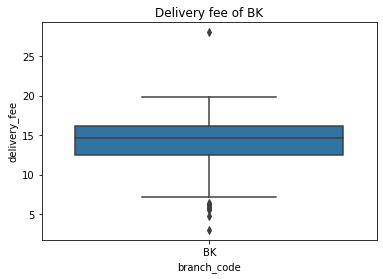

In [172]:
# for each branch we use boxplot to show the delivery fee values and how it's distributed
sns.boxplot(x = 'branch_code', y = 'delivery_fee', data = outliers_branch_bk)
plt.title('Delivery fee of BK')

As we can see from the above boxplot for branch_code 'BK', there are some outliers but we cannot exactly detect which one of the datapoint is actual outlier. Similarly we will plot delivery fee values for the other two branches as well.

Text(0.5, 1.0, 'Delivery fee of TP')

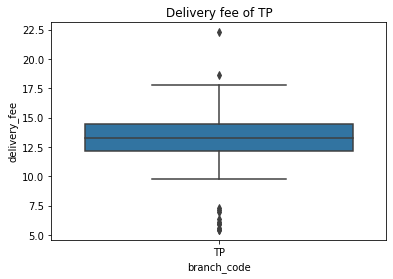

In [173]:
# for branch tp
sns.boxplot(x = 'branch_code', y = 'delivery_fee', data = outliers_branch_tp)
plt.title('Delivery fee of TP')

Text(0.5, 1.0, 'Delivery fee of TS')

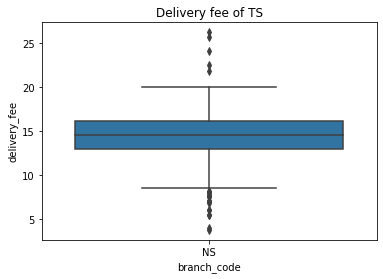

In [174]:
# for branch ns
sns.boxplot(x = 'branch_code', y = 'delivery_fee', data = outliers_branch_ns)
plt.title('Delivery fee of TS')

But potential outliers can be identified, by comparing given delivery fee values with predicted delivery fee values. So we predict the delivery fee of each branch with respect to the features.

Now we will predict delivery fee values in the outliers data based on the three models built in the missing values detection section.

In [175]:
#Now predicting the fare values of different branches in outliers data.

out_y_pred_bk = regressor_bk.predict(outliers_branch_bk[['distance_to_customer_KM','type_of_day',"time_of_day"]])
out_y_pred_tp = regressor_tp.predict(outliers_branch_tp[['distance_to_customer_KM','type_of_day',"time_of_day"]])
out_y_pred_ns = regressor_ns.predict(outliers_branch_ns[['distance_to_customer_KM','type_of_day',"time_of_day"]])

After we obtain the predicted values, we move to compare both delivery values with respect to branch_code.

At first, we assign the predicted delivery fee values to one column in all the three dataframes.

In [176]:
outliers_branch_bk['predicted_del_fee'] = list(out_y_pred_bk)
outliers_branch_tp['predicted_del_fee'] = list(out_y_pred_tp)
outliers_branch_ns['predicted_del_fee'] = list(out_y_pred_ns)

In [177]:
#Applying the customer loyalty to the predicted fare based on the above defined function'predict_del_fee'.

outliers_branch_bk = outliers_branch_bk.apply(lambda x: predict_del_fee(x,'predicted_del_fee'), axis = 1)
outliers_branch_tp = outliers_branch_tp.apply(lambda x: predict_del_fee(x,'predicted_del_fee'), axis = 1)
outliers_branch_ns = outliers_branch_ns.apply(lambda x: predict_del_fee(x,'predicted_del_fee'), axis = 1)

Let's compare given and predicted values of delivery fee with respect to each branch.

In [178]:
# taking indices values 
outliers_branch_bk['x_value'] = list(outliers_branch_bk.index.values)
outliers_branch_tp['x_value'] = list(outliers_branch_tp.index.values)
outliers_branch_ns['x_value'] = list(outliers_branch_ns.index.values)


Reshaping the dataframes using `melt()` function.

In [179]:
bk_melt = pd.melt(outliers_branch_bk[['x_value','delivery_fee','predicted_del_fee']], id_vars=['x_value'])

In [180]:
bk_melt.head()

,x_value,variable,value
0,2,delivery_fee,12.472215
1,4,delivery_fee,11.581713
2,7,delivery_fee,13.312528
3,10,delivery_fee,14.366332
4,14,delivery_fee,14.919006


Text(0.5, 1, 'Given vs Predicted Delivery fee values branch BK')

<Figure size 1152x432 with 0 Axes>

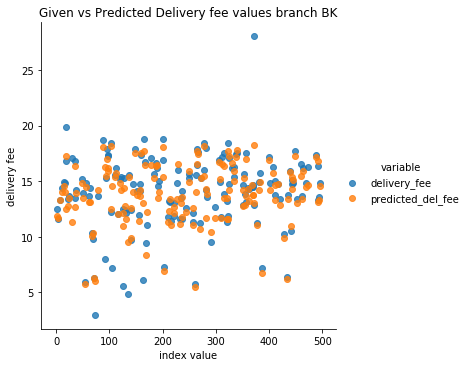

In [181]:
plt.figure(figsize=(16, 6))
sns.lmplot( x="x_value", y="value", data=bk_melt, fit_reg=False, hue='variable')
plt.ylabel('delivery fee')
plt.xlabel('index value')
plt.title('Given vs Predicted Delivery fee values branch BK')

As we can see from the above scatterplot, given values vs predicted delivery fee values, there are many values which are not close to the predicted values.

In [182]:
tp_melt = pd.melt(outliers_branch_tp[['x_value','delivery_fee','predicted_del_fee']], id_vars=['x_value'])

Text(0.5, 1, 'Given vs Predicted Delivery fee values branch TP')

<Figure size 1152x432 with 0 Axes>

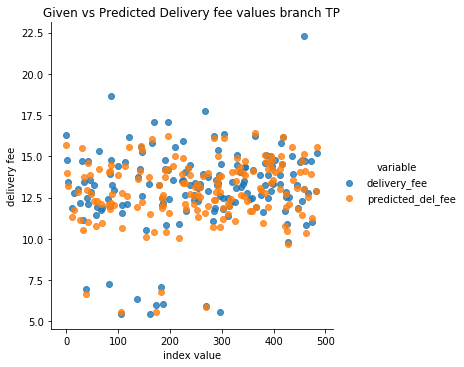

In [183]:
plt.figure(figsize=(16, 6))
ax = sns.lmplot(x = 'x_value' , y = 'value', hue = 'variable',fit_reg=False, data=tp_melt)
plt.ylabel('delivery fee')
plt.xlabel('index value')
plt.title('Given vs Predicted Delivery fee values branch TP')

Similarly for branch 'TP' also, we can see there are some outliers.

In [184]:
ns_melt = pd.melt(outliers_branch_ns[['x_value','delivery_fee','predicted_del_fee']], id_vars=['x_value'])

Text(0.5, 1, 'Given vs Predicted Delivery fee values branch NS')

<Figure size 3600x1080 with 0 Axes>

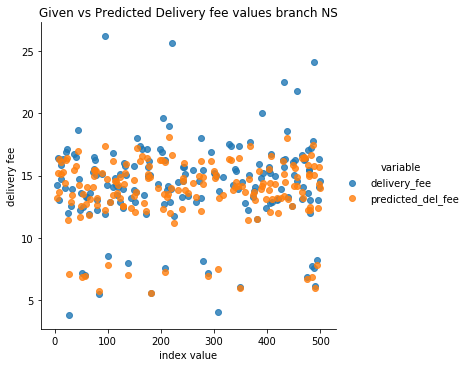

In [185]:
plt.figure(figsize=(50, 15))
ax = sns.lmplot(x = 'x_value' , y = 'value', hue = 'variable',fit_reg=False, data=ns_melt)
plt.ylabel('delivery fee')
plt.xlabel('index value')
plt.title('Given vs Predicted Delivery fee values branch NS')

In [186]:
#Finding the residuals for the predicted and actial values for the given outlier data which has been split to 
#different datframes above.
outliers_branch_bk['residuals'] = outliers_branch_bk['delivery_fee'] - outliers_branch_bk['predicted_del_fee']
outliers_branch_tp['residuals'] = outliers_branch_tp['delivery_fee'] - outliers_branch_tp['predicted_del_fee']
outliers_branch_ns['residuals'] = outliers_branch_ns['delivery_fee'] - outliers_branch_ns['predicted_del_fee']

In [187]:
detected_out_bk = outliers_branch_bk[~((outliers_branch_bk['residuals']>lower_bk)&
                     (outliers_branch_bk['residuals']<upper_bk))]


#Getting all the index values of the outliers in the bk branch.
bk_index = list(detected_out_bk.index.values.astype(int))

print(f'The number of outliers in the branch bk are {len(detected_out_bk)}')

detected_out_bk

The number of outliers in the branch bk are 10


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,time_of_day,predicted_del_fee,x_value,residuals
18,ORDK10351,2018-08-02,15:05:54,Lunch,BK,"[(Chicken, 5), (Fries, 5), (Salad, 3), (Steak,...",541.6,-37.800849,144.980357,0,6.708,19.864435,0,1,12.457376,18,7.407059
29,ORDA04107,2018-03-13,10:21:58,Breakfast,BK,"[(Eggs, 8), (Pancake, 10)]",418.5,-37.823877,144.981668,0,6.947,17.098198,0,0,11.320027,29,5.778171
73,ORDX02600,2018-01-10,08:10:08,Breakfast,BK,"[(Coffee, 7), (Pancake, 8), (Cereal, 10), (Egg...",654.5,-37.813954,144.963645,1,7.720,2.958493,0,0,5.984509,73,-3.026016
91,ORDA09307,2018-09-30,16:57:27,Dinner,BK,"[(Fish&Chips, 3), (Shrimp, 2), (Pasta, 3), (Sa...",541.5,-37.824438,144.990431,0,6.662,7.972620,1,2,16.306248,91,-8.333629
105,ORDA04399,2018-10-18,17:38:01,Dinner,BK,"[(Salmon, 4), (Pasta, 5), (Shrimp, 3), (Fish&C...",533.5,-37.818721,144.967189,0,7.623,7.189867,0,2,14.563594,105,-7.373728
126,ORDX05795,2018-02-05,09:00:50,Breakfast,BK,"[(Eggs, 7), (Cereal, 3), (Coffee, 9), (Pancake...",478.5,-37.820615,144.983734,0,6.488,5.530509,0,0,10.934662,126,-5.404153
134,ORDX01809,2018-02-26,09:51:32,Breakfast,BK,"[(Cereal, 3), (Eggs, 3), (Coffee, 1), (Pancake...",233.5,-37.813030,144.995793,0,4.800,4.797914,0,0,9.517461,134,-4.719547
163,ORDX08996,2018-09-27,16:57:27,Dinner,BK,"[(Pasta, 5), (Fish&Chips, 9), (Salmon, 5)]",657.5,-37.802536,145.015988,0,5.782,6.128014,0,2,13.017938,163,-6.889923
282,ORDA08308,2018-05-29,12:54:05,Lunch,BK,"[(Steak, 1), (Burger, 10), (Fries, 10)]",475.0,-37.816851,144.988154,0,5.797,18.019414,0,1,11.692524,282,6.326891
371,ORDX04323,2018-09-29,16:57:27,Dinner,BK,"[(Salmon, 10), (Shrimp, 3), (Fish&Chips, 7), (...",899.5,-37.801404,144.948358,0,9.021,28.045075,1,2,18.286804,371,9.758271


In [188]:
detected_out_tp = outliers_branch_tp[~((outliers_branch_tp['residuals']>lower_tp)&
                     (outliers_branch_tp['residuals']<upper_tp))]

#Getting all the index values of the outliers in the tp branch.
tp_index = list(detected_out_tp.index.values.astype(int))

print(f'The number of outliers in the branch tp are {len(detected_out_tp)}')

detected_out_tp

The number of outliers in the branch tp are 9


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,time_of_day,predicted_del_fee,x_value,residuals
82,ORDB01992,2018-07-13,14:25:21,Lunch,TP,"[(Steak, 10), (Burger, 9), (Fries, 1)]",741.00,-37.818459,145.007686,0,11.480,7.279089,0,1,14.027758,82,-6.748669
86,ORDY08944,2018-06-13,13:24:30,Lunch,TP,"[(Chicken, 1), (Fries, 2), (Burger, 7), (Steak...",498.00,-37.811393,144.953334,0,8.957,18.633139,0,1,12.145600,86,6.487539
136,ORDB01066,2018-04-14,11:22:49,Breakfast,TP,"[(Coffee, 8), (Pancake, 5), (Eggs, 7), (Cereal...",503.25,-37.825172,144.970144,0,8.222,6.368985,1,0,11.916487,136,-5.547502
162,ORDY06148,2018-06-26,13:44:47,Lunch,TP,"[(Burger, 9), (Salad, 1), (Chicken, 5), (Steak...",546.20,-37.822105,144.956734,0,8.061,5.415970,0,1,11.477184,162,-6.061214
170,ORDY10311,2018-04-12,11:12:40,Breakfast,TP,"[(Coffee, 7), (Eggs, 9), (Cereal, 10)]",460.50,-37.813903,144.961731,0,8.279,17.077268,0,0,10.387171,170,6.690097
186,ORDJ04533,2018-07-10,14:15:12,Lunch,TP,"[(Burger, 7), (Fries, 2)]",241.00,-37.824721,144.982706,0,8.852,6.067355,0,1,12.067270,186,-5.999916
268,ORDJ09405,2018-05-07,12:03:22,Lunch,TP,"[(Steak, 4), (Chicken, 5), (Salad, 10), (Burge...",667.00,-37.813410,144.962113,0,8.187,17.753392,0,1,11.571180,268,6.182212
296,ORDB09789,2018-02-08,09:10:59,Breakfast,TP,"[(Cereal, 8), (Coffee, 6)]",213.00,-37.821566,144.980524,0,8.702,5.582724,0,0,10.702729,296,-5.120005
458,ORDY04877,2018-10-26,17:48:10,Dinner,TP,"[(Shrimp, 4), (Pasta, 10), (Fish&Chips, 2)]",561.00,-37.806849,144.997909,0,11.302,22.279332,0,2,15.147611,458,7.131722


In [189]:
detected_out_ns = outliers_branch_ns[~((outliers_branch_ns['residuals']>lower_ns)&
                     (outliers_branch_ns['residuals']<upper_ns))]

#Getting all the index values of the outliers in the ns branch.
ns_index = list(detected_out_ns.index.values.astype(int))


print(f'The number of outliers in the branch ns are {len(detected_out_ns)}')

detected_out_ns

The number of outliers in the branch ns are 11


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,type_of_day,time_of_day,predicted_del_fee,x_value,residuals
28,ORDI10038,2018-01-03,08:00:00,Breakfast,NS,"[(Eggs, 5), (Pancake, 9)]",328.25,-37.799820,145.014797,1,10.636,3.786059,0,0,7.097078,28,-3.311019
95,ORDZ03789,2018-10-28,17:58:18,Dinner,NS,"[(Fish&Chips, 2), (Shrimp, 2), (Pasta, 1)]",205.50,-37.821319,144.990853,0,9.600,26.212200,1,2,17.366278,95,8.845921
204,ORDC01538,2018-01-30,08:50:42,Breakfast,NS,"[(Pancake, 1), (Coffee, 9), (Eggs, 9)]",289.75,-37.798811,144.989180,0,8.054,19.626864,0,0,12.321082,204,7.305782
220,ORDI01266,2018-09-03,16:06:45,Dinner,NS,"[(Salmon, 3), (Pasta, 3)]",205.50,-37.819135,145.010110,0,11.068,25.681283,0,2,16.619555,220,9.061728
279,ORDC08048,2018-03-17,10:21:58,Breakfast,NS,"[(Coffee, 4), (Pancake, 10), (Cereal, 8)]",440.50,-37.820352,144.982628,0,9.084,8.135430,1,0,14.879943,279,-6.744512
307,ORDC00383,2018-01-13,08:20:16,Breakfast,NS,"[(Pancake, 10), (Coffee, 10), (Cereal, 2), (Eg...",447.50,-37.819273,144.988521,1,9.244,4.038561,1,0,7.498006,307,-3.459445
391,ORDI10339,2018-12-24,19:49:51,Dinner,NS,"[(Pasta, 6), (Salmon, 3)]",288.00,-37.813670,144.974200,0,7.719,20.038793,0,2,14.190072,391,5.848721
432,ORDZ09052,2018-01-19,08:30:25,Breakfast,NS,"[(Coffee, 6), (Eggs, 10), (Cereal, 9)]",454.00,-37.822660,144.955517,0,9.531,22.515346,0,0,13.392550,432,9.122796
456,ORDZ03060,2018-06-04,13:04:13,Lunch,NS,"[(Fries, 6), (Steak, 8), (Burger, 7)]",649.00,-37.807394,144.998682,0,9.084,21.836652,0,1,14.124286,456,7.712367
488,ORDZ05817,2018-09-25,16:47:19,Dinner,NS,"[(Shrimp, 10), (Pasta, 2), (Salmon, 4)]",759.00,-37.823145,144.978191,0,8.877,7.590410,0,2,15.030126,488,-7.439717


Checking all the above cells in detecting the we have identified 9 in each of the branches which results in a total of 27 outliers and hence dropping these rows to produced output outliers file.

In [190]:
drop_index = bk_index + tp_index + ns_index

#dropping the outlier rows gathered from the above analysis.
outlier_data_df = outlier_data_df.drop(drop_index).reset_index().drop(['index'],axis=1)


Hence we have removed all the outliers from the outliers data file.

In [191]:
outlier_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day',
       'time_of_day'],
      dtype='object')

In [192]:
# dropping the irrelevant columns in outlier_data_df dataframe
outlier_data_df = outlier_data_df.drop(['type_of_day','time_of_day'], axis= 1)

In [193]:
outlier_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee'],
      dtype='object')

In [194]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee', 'type_of_day', 'time_of_day',
       'calculated_del_fee', 'ratio'],
      dtype='object')

In [199]:
# dropping irrelevent columns in dirty_data_df dataframe
dirty_data_df = dirty_data_df.drop(['type_of_day','time_of_day','calculated_del_fee','ratio'], axis= 1)

In [200]:
dirty_data_df.columns

Index(['order_id', 'date', 'time', 'order_type', 'branch_code', 'order_items',
       'order_price', 'customer_lat', 'customer_lon', 'customerHasloyalty?',
       'distance_to_customer_KM', 'delivery_fee'],
      dtype='object')

Generating all three csv files.

In [201]:
dirty_data_df.to_csv(r'group053_dirty_data_solution.csv',index=False)
missing_data_df.to_csv(r'group053_missing_data_solution.csv',index=False)
outlier_data_df.to_csv(r'group053_outlier_data_solution.csv',index=False)

## Summary
The main outcomes of Data Cleansing Assessement are as follows:
- **Dirty Data Cleaning** finding syntacic errors and semantic errors in the file and cleaning them using pandas module methods.
- **networkx package** usage of networkx package to find the shortest distance between branch and customer location in the dirty and missing data files.
- **numpy.linalg** usage python package to solve a linera system of equations ( to find the order price column in the dirty data file).
- **Missing Data file** missing values had been imputed in the columns branch_code, distance_to_customer_KM and delivery fee(using linear regressio model delivery column values are imputed).
- **Outliers Data file** outliers had been identified in the column delivery fee and removed using 3sigma rule based on the models built.

## References
- The `pandas` Project. (2016a). *pandas 0.19.2 documentation: pandas.DataFrame.to_csv*. Retrieved from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv
- The `pandas` Project. (2016c). *pandas 0.19.2 documentation: pandas.Series.map*. Retrieved from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
- The `pandas` module. *Renaming column names*. [Response to]. Retrieved from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- The `networkx` package. *to use djikstra algorithm*. [Response to]. Retrieved from https://networkx.github.io/documentation/stable/tutorial.html
- The `matplotlib` module. *to visualise the data*. [Response to]. Retrieved from https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
- The `seaborn` module. *to visualise the data*. [Response to]. Retrieved from https://seaborn.pydata.org/
- The `sklearn` module. *used to build models*. [Response to]. Retrieved from https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9.